## *This notebook reproduces entanglement spectrum results in Li and Haldane, PRL 101, 010504 (2008)*

### Load QHED code

In [1]:
qhed_dir = "../"
# CG_dir = joinpath(qhed_dir, "CG") # specify directory for precomputed Clebsch-Gordan coefficients

include(joinpath(qhed_dir, "src", "QHED.jl"));

### Set matplotlib defaults

In [2]:
using PyPlot

PyPlot.matplotlib[:rc]("font", size=14)
PyPlot.matplotlib[:rc]("text", usetex=true)
PyPlot.matplotlib[:rc]("xtick", direction="in", bottom="on", top="on")
PyPlot.matplotlib[:rc]("xtick.minor", visible="on")
PyPlot.matplotlib[:rc]("ytick", direction="in", left="on", right="on")
PyPlot.matplotlib[:rc]("ytick.minor", visible="on")

# bblue = "#0C2340"
# borange = "#FC4C02"

### Set parameters and build setup
$N$ = number of electrons

$N_\phi$ = number of flux quanta penetrating sphere

For a LLL problem at filling factor $\nu$, we will in general have $N_\phi = \nu^{-1}N - S$, where $S$ is the "shift".

In [3]:
N = 16
Nphi = 2N - 3 # choose the Moore-Read shift

setup = HaldaneSphereSetupLLL(N, Nphi, 0);

Building states list for N = 16, Nphi = 29, Lz = 0 ...
Finished building states list of size 2374753
elapsed time: 355.810371755 seconds

Building L^2 matrix of size 2374753 x 2374753 ...
Working on LpLm, column j = 1: 1/2374753 = 4.2109642560721055e-5%
Working on LpLm, column j = 118738: 118738/2374753 = 5.0000147383748965%
Working on LpLm, column j = 237476: 237476/2374753 = 10.000029476749793%
Working on LpLm, column j = 356214: 356214/2374753 = 15.000044215124689%
Working on LpLm, column j = 474952: 474952/2374753 = 20.000058953499586%
Working on LpLm, column j = 593690: 593690/2374753 = 25.00007369187448%
Working on LpLm, column j = 712428: 712428/2374753 = 30.000088430249377%
Working on LpLm, column j = 831166: 831166/2374753 = 35.00010316862427%
Working on LpLm, column j = 949904: 949904/2374753 = 40.00011790699917%
Working on LpLm, column j = 1068642: 1068642/2374753 = 45.000132645374066%
Working on LpLm, column j = 1187380: 1187380/2374753 = 50.00014738374896%
Working on LpLm,

### Calculate Coulomb pseudopotentials for the first excited ($n = 1$) Landau level

In [4]:
pp = spherical_Coulomb_pseudopotentials(get_ell(setup), 1)

SphericalPseudopotentials(14.5, 13.5, [29.0, 28.0, 27.0, 26.0, 25.0, 24.0, 23.0, 22.0, 21.0, 20.0  …  9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0], [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0  …  20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0], [0.636754, 0.43937, 0.486364, 0.342107, 0.288476, 0.256355, 0.234165, 0.217661, 0.204809, 0.194478  …  0.146247, 0.144548, 0.143087, 0.141844, 0.140804, 0.139955, 0.139287, 0.138792, 0.138465, 0.138302])

### Build Hamiltonian

In [5]:
@time Hami = HaldaneSphereHamiLLL(setup, pp, build_CG_table(get_ell(setup)));
# @time Hami = HaldaneSphereHamiLLL(setup, pp, load_CG_table(get_ell(setup), CG_dir));

Building CG table for ell1 = 14.5, ell2 = 14.5:
Working on alpha1 = 1: 1/30
Working on alpha1 = 2: 2/30
Working on alpha1 = 3: 3/30
Working on alpha1 = 4: 4/30
Working on alpha1 = 5: 5/30
Working on alpha1 = 6: 6/30
Working on alpha1 = 7: 7/30
Working on alpha1 = 8: 8/30
Working on alpha1 = 9: 9/30
Working on alpha1 = 10: 10/30
Working on alpha1 = 11: 11/30
Working on alpha1 = 12: 12/30
Working on alpha1 = 13: 13/30
Working on alpha1 = 14: 14/30
Working on alpha1 = 15: 15/30
Working on alpha1 = 16: 16/30
Working on alpha1 = 17: 17/30
Working on alpha1 = 18: 18/30
Working on alpha1 = 19: 19/30
Working on alpha1 = 20: 20/30
Working on alpha1 = 21: 21/30
Working on alpha1 = 22: 22/30
Working on alpha1 = 23: 23/30
Working on alpha1 = 24: 24/30
Working on alpha1 = 25: 25/30
Working on alpha1 = 26: 26/30
Working on alpha1 = 27: 27/30
Working on alpha1 = 28: 28/30
Working on alpha1 = 29: 29/30
Working on alpha1 = 30: 30/30
elapsed time: 315.37450272 seconds

Building 2-body interaction matrix

### Diagonalize Hamiltonian to find ground state wave function

In [6]:
eigs!(Hami, 1)
psi = Hami.eigenstates[:, 1];

Diagonalizing Hami of size 2374753 x 2374753 with eigs, nev = 1 ...
elapsed time: 531.746492544 seconds



### Calculate and plot entanglement spectra for different bipartition configurations (cf. Fig. 2 of Li and Haldane)

In [7]:
subsystemA = collect(16:get_Norb(setup))
NA = 8
LzAvec = collect(49.:67.)

ent_spec = entanglement_spectrum(psi, setup.states, subsystemA, NA, LzAvec);

Calculating entanglement spectrum for NA = 8, LzA = [49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0] ...
elapsed time: 696.692456998 seconds



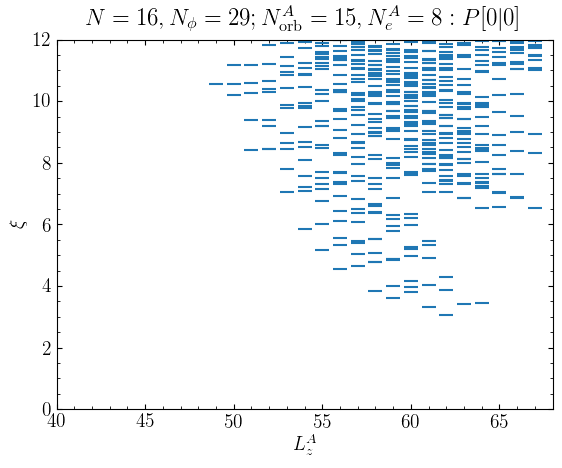

In [8]:
fig, ax = subplots()
ax[:plot](ent_spec[:, 1], ent_spec[:, 2], ls="none", marker="_", ms="10", mew="1.5")
ax[:set_xlabel]("\$L_z^A\$")
ax[:set_ylabel]("\$\\xi\$")
ax[:set_title]("\$N=$(N), N_\\phi=$(Nphi); N_\\mathrm{orb}^A=$(length(subsystemA)), N_e^A=$(NA) : P[0|0]\$")
ax[:set_xlim](40, 68)
ax[:set_ylim](0, 12);

In [9]:
subsystemA = collect(15:get_Norb(setup))
NA = 8
LzAvec = collect(50.:67.)

ent_spec = entanglement_spectrum(psi, setup.states, subsystemA, NA, LzAvec);

Calculating entanglement spectrum for NA = 8, LzA = [50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0] ...
elapsed time: 446.294034166 seconds



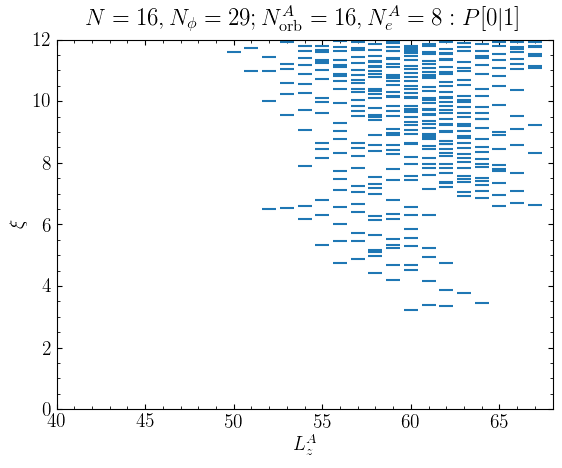

In [10]:
fig, ax = subplots()
ax[:plot](ent_spec[:, 1], ent_spec[:, 2], ls="none", marker="_", ms="10", mew="1.5")
ax[:set_xlabel]("\$L_z^A\$")
ax[:set_ylabel]("\$\\xi\$")
ax[:set_title]("\$N=$(N), N_\\phi=$(Nphi); N_\\mathrm{orb}^A=$(length(subsystemA)), N_e^A=$(NA) : P[0|1]\$")
ax[:set_xlim](40, 68)
ax[:set_ylim](0, 12);

In [11]:
subsystemA = collect(14:get_Norb(setup))
NA = 9
LzAvec = collect(48.5:66.5)

ent_spec = entanglement_spectrum(psi, setup.states, subsystemA, NA, LzAvec);

Calculating entanglement spectrum for NA = 9, LzA = [48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5] ...
elapsed time: 686.542615196 seconds



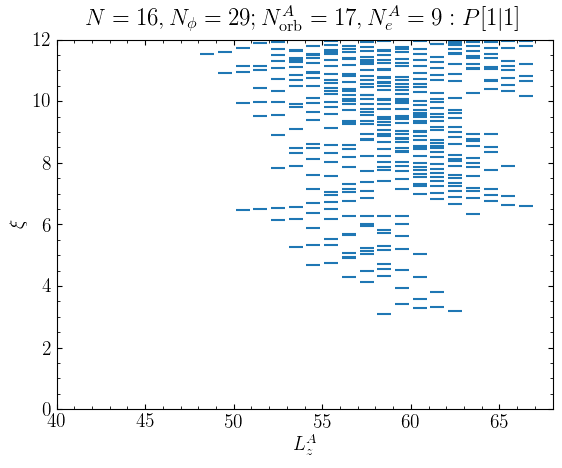

In [12]:
fig, ax = subplots()
ax[:plot](ent_spec[:, 1], ent_spec[:, 2], ls="none", marker="_", ms="10", mew="1.5")
ax[:set_xlabel]("\$L_z^A\$")
ax[:set_ylabel]("\$\\xi\$")
ax[:set_title]("\$N=$(N), N_\\phi=$(Nphi); N_\\mathrm{orb}^A=$(length(subsystemA)), N_e^A=$(NA) : P[1|1]\$")
ax[:set_xlim](40, 68)
ax[:set_ylim](0, 12);